# Predicting Elastic Strain in Linear FE Model

A Rod of below dimensions and material properties is put under static force and strains are noted for each force.
Since this is a linear model, Linear Regression is used to fit the behaviour curve and predict a few values.


Rod Dimensions: </br>
Diameter = 200 mm </br>
Length = 1000 mm </br>

Material Properties:</br>
Young's Modulus = 210000 N/mm^2</br>
Poisson's Ratio = 0.3</br>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
%matplotlib inline

C:\Users\pushu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = pd.read_csv('force_strain.csv', header=None)

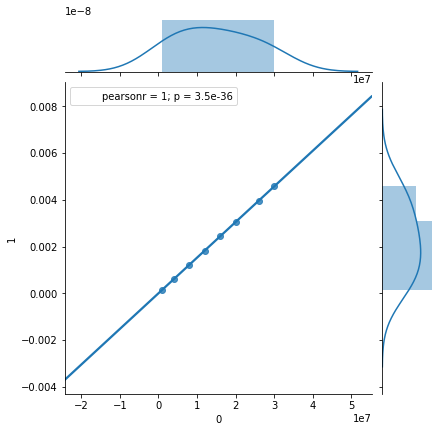

In [3]:
sns.jointplot(x=dataset[0], y=dataset[1], data=dataset, kind='reg')

In [4]:
#Splitting the dataset to training set and test set
x_train, x_test, y_train, y_test = train_test_split(dataset[0],dataset[1], test_size = 1/3, random_state=0)
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Train - Target shape', x_train.shape)

Train - Predictors shape (5, 1)
Test - Predictors shape (3, 1)
Train - Target shape (5, 1)
Train - Target shape (5, 1)


C:\Users\pushu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [5]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
y_predict = regressor.predict(x_test)

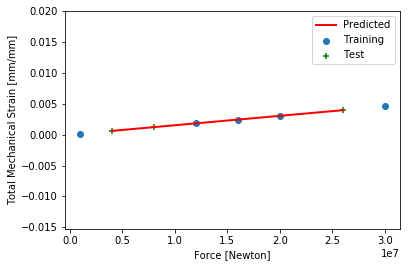

In [7]:
plt.scatter(x_train,y_train, label = "Training")
plt.scatter(x_test, y_test, marker='+', color='green', label = "Test")
plt.plot(x_test, y_predict, color='red', linewidth=2, label = "Predicted")
plt.xlabel("Force [Newton]")
plt.ylabel("Total Mechanical Strain [mm/mm]")
#plt.xlim(-1e7,4e7)
plt.legend()
plt.show()

In [8]:
mean_squared_error(y_test,y_predict)

1.1194421207164633e-17